# 作業四至作業六:郵務資料分析

### 分析目的:i郵箱為中華郵政公司提供一種新型態的/寄郵件體驗，其特色在於可以配合收、寄件人用郵時間，因此不需要在營業時間到郵局領取郵件或是在家等待郵差。此份作業期望能透過不同欄位的資料獲取關鍵的訊息。
#### 使用資料:郵務收寄資料明細檔(經過與特種郵件追蹤查詢資料檔比對篩選出只有投遞到i郵箱的資料)共8808筆資料
#### 欄位介紹請參考[中華郵政大數據競賽資料欄位規格.xlsx]

In [2]:
#call magic function
%matplotlib inline
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
import jieba
import pandas as pd
import numpy as np
import math

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

讀取i郵箱資料

In [3]:
accg3=pd.read_csv("D:/competition/sample/ACC_G3_FINAL.csv",header=None,encoding='BIG5')
accg3.columns=["acc"+str(i) for i in range(1,39) ]
accg3.head()

,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,...,acc29,acc30,acc31,acc32,acc33,acc34,acc35,acc36,acc37,acc38
0,400030.0,0,1,1,0,1070102,84717,400999,NaN,0,...,1,1,833.0,1,2.336630e+13,2.336630e+13,NaN,NaN,10701,1
1,100010.0,0,1,1,0,1070102,91245,100999,NaN,0,...,3,1,40.0,1,9.837500e+19,9.837500e+19,41.0,F,10701,1
2,900022.0,0,1,1,0,1070102,93753,900999,NaN,0,...,1,1,12.0,1,9.763060e+19,9.763060e+19,NaN,NaN,10701,1
3,320043.0,0,1,1,0,1070102,95002,330999,NaN,0,...,1,1,20.0,1,9.526220e+19,9.526220e+19,NaN,NaN,10701,1
4,330012.0,0,1,1,0,1070102,100634,330999,NaN,0,...,5,1,1853.0,1,6.964050e+13,6.964050e+13,52.0,F,10701,1


檢查每一欄缺失值，若使用某一欄變數有缺失值需要修正

In [4]:
#確認每一欄缺失的個數
print(accg3.shape[0]-accg3.count() )

acc1        0
acc2        0
acc3        0
acc4        0
acc5        0
acc6        0
acc7        0
acc8        0
acc9     8800
acc10       0
acc11       0
acc12       0
acc13       0
acc14       3
acc15       0
acc16       0
acc17       0
acc18       0
acc19       0
acc20    8805
acc21       0
acc22       0
acc23       0
acc24       0
acc25       0
acc26     280
acc27       0
acc28    2376
acc29       0
acc30       0
acc31       0
acc32       0
acc33       0
acc34       0
acc35    4113
acc36    5472
acc37       0
acc38       0
dtype: int64


## 目標一: 研究acc27(郵件種類名稱)其文字訊息

利用jeiba進行中文斷詞，並加入自訂義字典

In [5]:
office_text=accg3["acc27"]
#print(office_text)
doc_names = range(len(office_text))
#加入自訂義字典
jieba.load_userdict("C:/Users/msi/Desktop/資料科學程式設計/hw4_6/郵務字典.txt")
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, office_text)}

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\msi\AppData\Local\Temp\jieba.cache
Loading model cost 0.912 seconds.
Prefix dict has been built succesfully.


顯示第一個收寄明細資料其郵件種類名稱的詞彙與對應詞頻

In [6]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
list(doc_word_frequency[0].items())[0:10] 

[('不同縣市', 1), ('包裹', 1)]

建立詞頻矩陣

In [7]:
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()
wfm = wfm[list(set(wfm))]
wfm.head()

D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,同縣市,限時,存證,快捷,回執,紙幣,普通,國內,法定,報值,...,公件,小包,附回執,包裹,信函,明信片,不同縣市,印刷物,掛號,島嶼間互寄
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


建立TF-IDF矩陣: TF-ID單純以詞頻衡量詞的重要性，並沒有考慮詞性和詞的位置信息，但郵件種類名稱大部分為名詞為主，且詞頻是最重要的訊息，因此可以套用TF-IDF模型

In [8]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf.head()

,同縣市,限時,存證,快捷,回執,紙幣,普通,國內,法定,報值,...,公件,小包,附回執,包裹,信函,明信片,不同縣市,印刷物,掛號,島嶼間互寄
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.620649,0.000000,0.0,0.784088,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.547584,0.0,0.0,0.0,...,0.0,0.656075,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.519343,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.503492,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.720045,0.0,0.000000,0.0,0.477526,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.503492,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.000000,0.720045,0.0,0.000000,0.0,0.477526,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.620649,0.000000,0.0,0.784088,0.0,0.000000,0.0


畫文字雲比較詞頻矩陣和TF-IDF矩陣

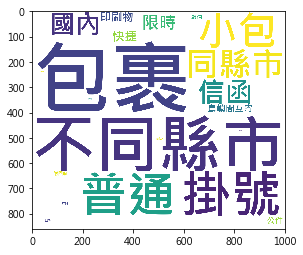

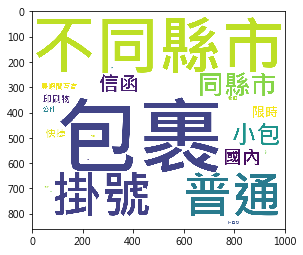

In [9]:
font = r'C:\Windows\Fonts\msjhbd.ttc'
wc= WordCloud(font_path = font,background_color="white",width=1000, height=860, margin=2)                                                                                                     
wc.generate_from_frequencies( dict(   zip(wfm.keys(),list(np.sum(wfm,axis=0))  )  ) )   
plt.imshow(wc)
#plt.axis("off")
plt.show()

wc2= WordCloud(font_path = font,background_color="white",width=1000, height=860, margin=2)                                                                                                     
wc2.generate_from_frequencies( dict(   zip(df_tfidf.keys(),list(np.sum(df_tfidf,axis=0))  )  ) )   
plt.imshow(wc2)
#plt.axis("off")
plt.show()

由上面兩張圖可以發現TF-IDF矩陣把一些出現頻率比較少但重要的資訊凸顯出來(例如:不同縣市)，而出現頻率高但相對不重要的資訊降低其重要性(例如:包裹)

<BarContainer object of 21 artists>

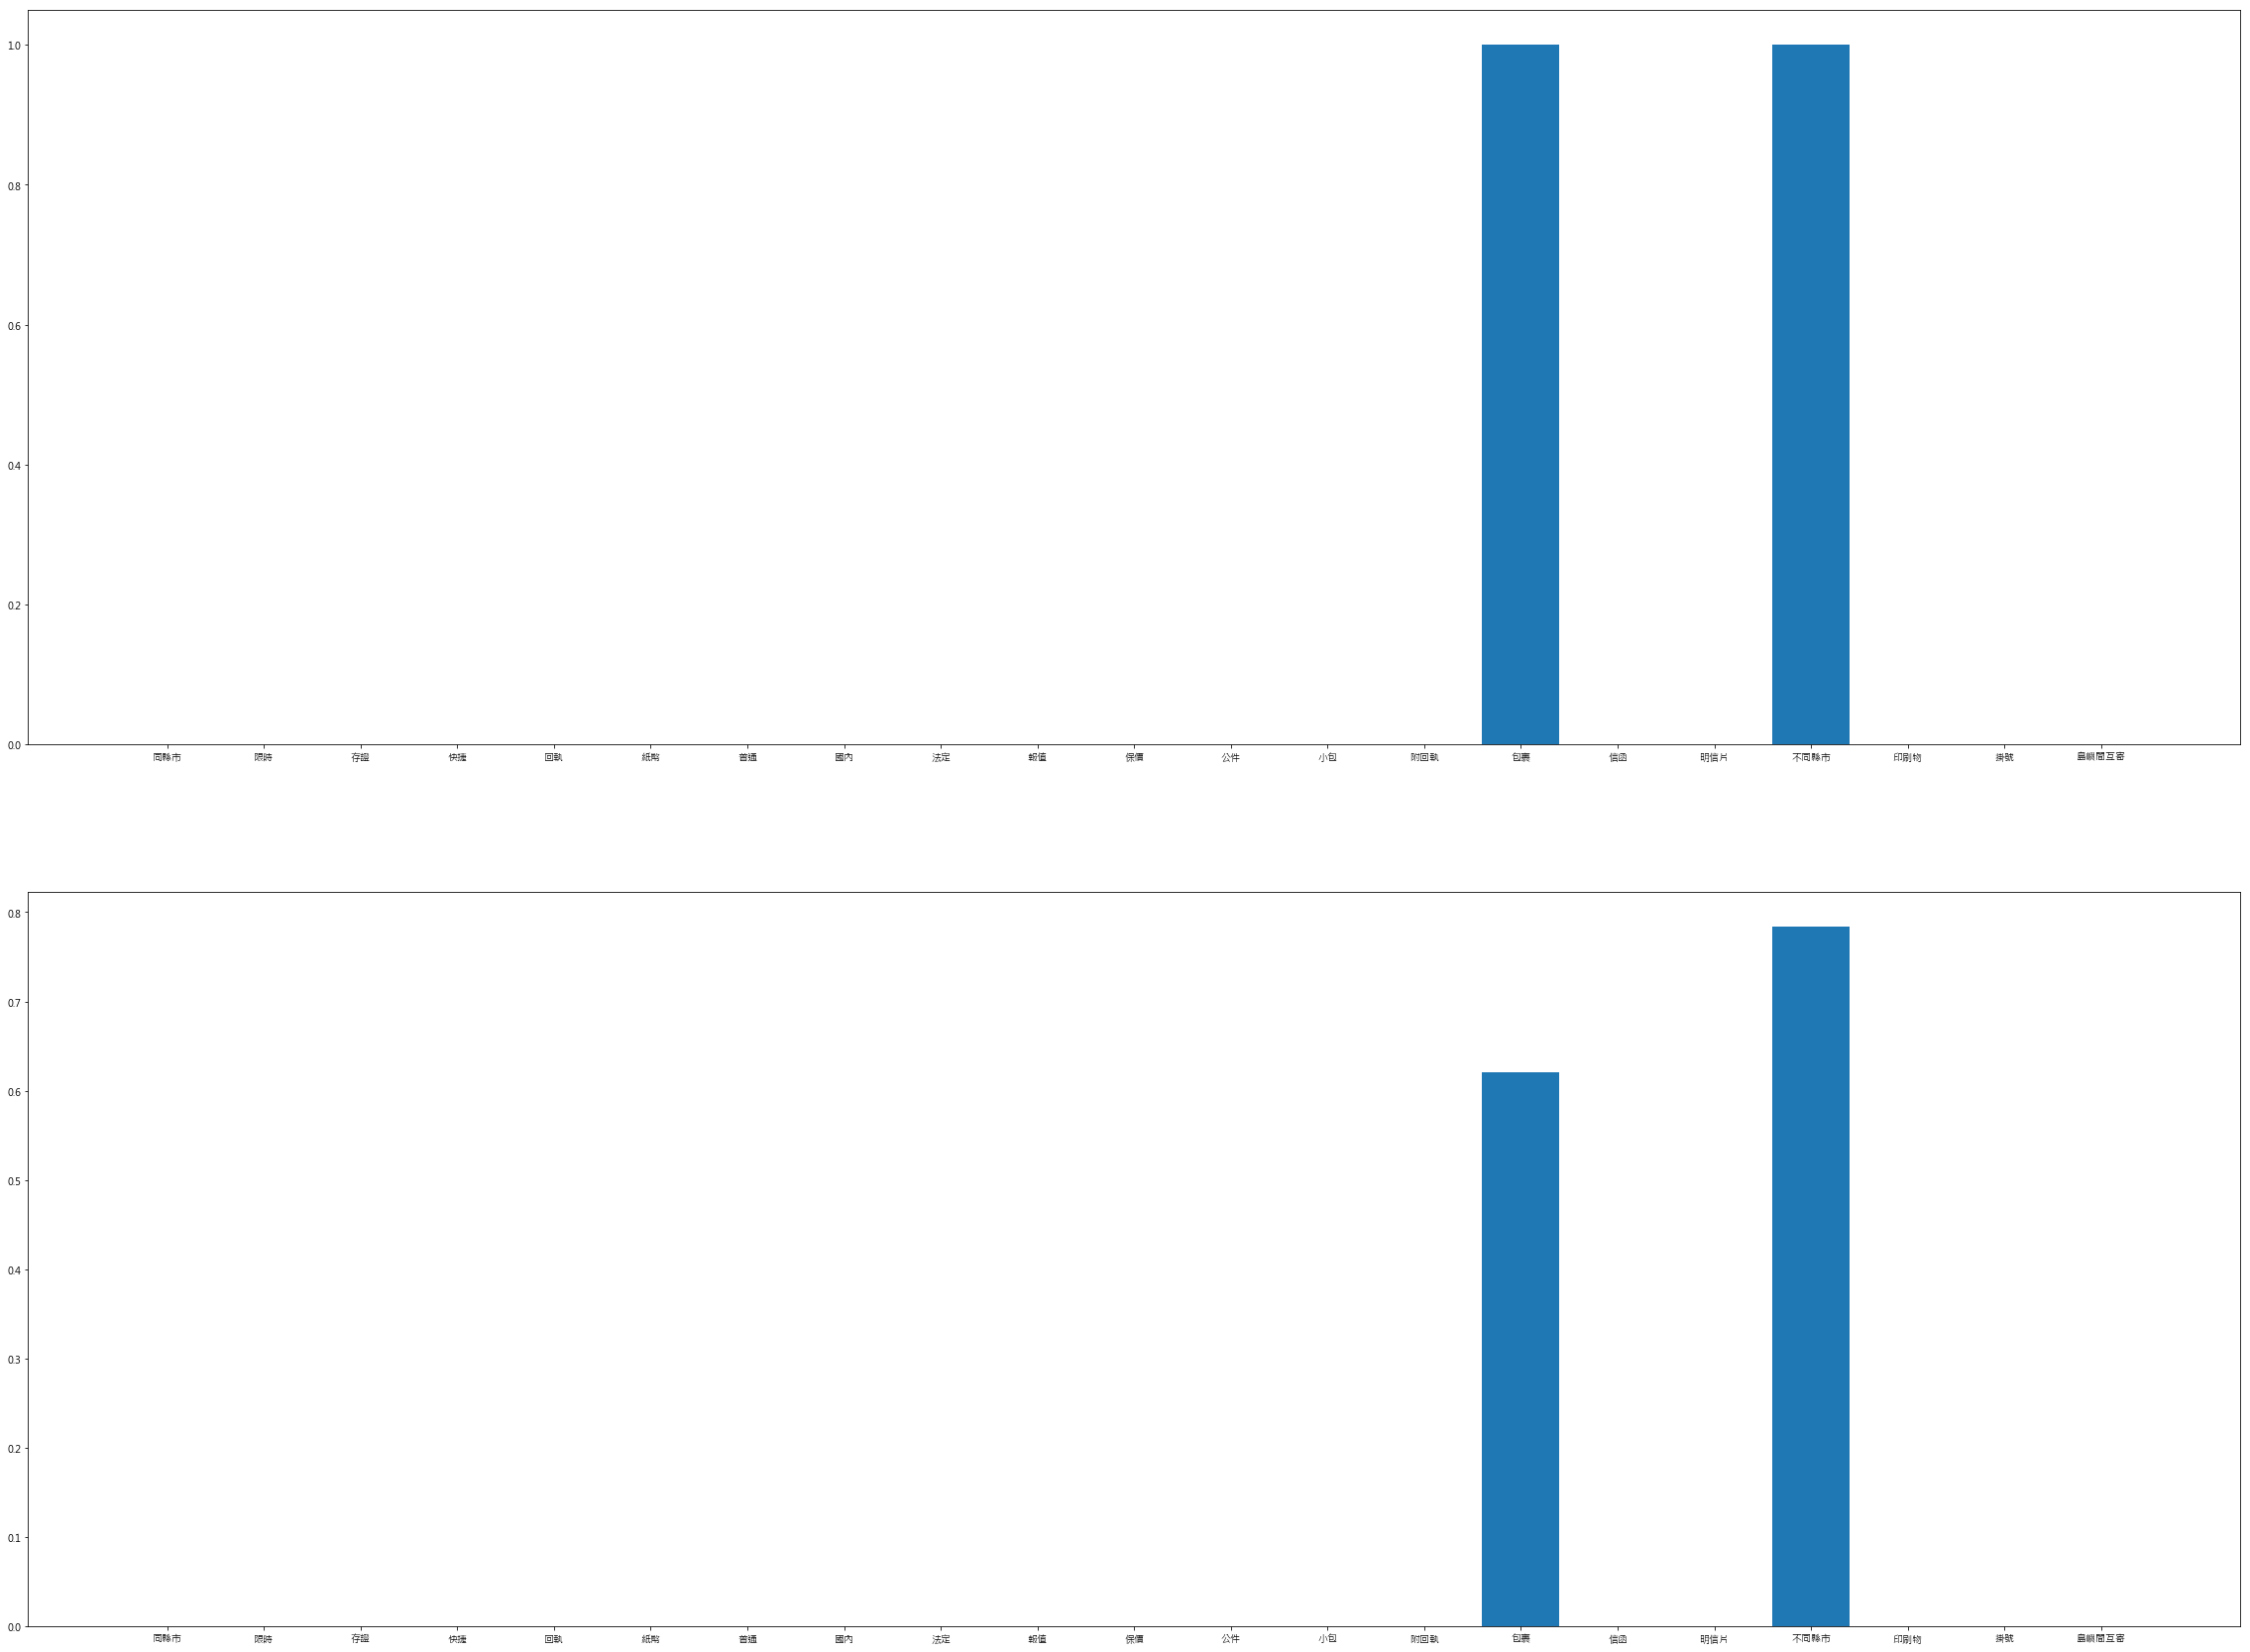

In [10]:
#loc是根據dataframe的具體標籤選取列，而iloc是根據標籤所在的位置，從0開始計數。
plt.figure(figsize=(40, 30))
ax1 = plt.subplot(211)
ax1.bar(wfm.keys(),list(np.sum(wfm.iloc[0:1],axis=0)))
ax2 = plt.subplot(212)
ax2.bar(df_tfidf.keys(),list(np.sum(df_tfidf.iloc[0:1],axis=0)) )

<BarContainer object of 21 artists>

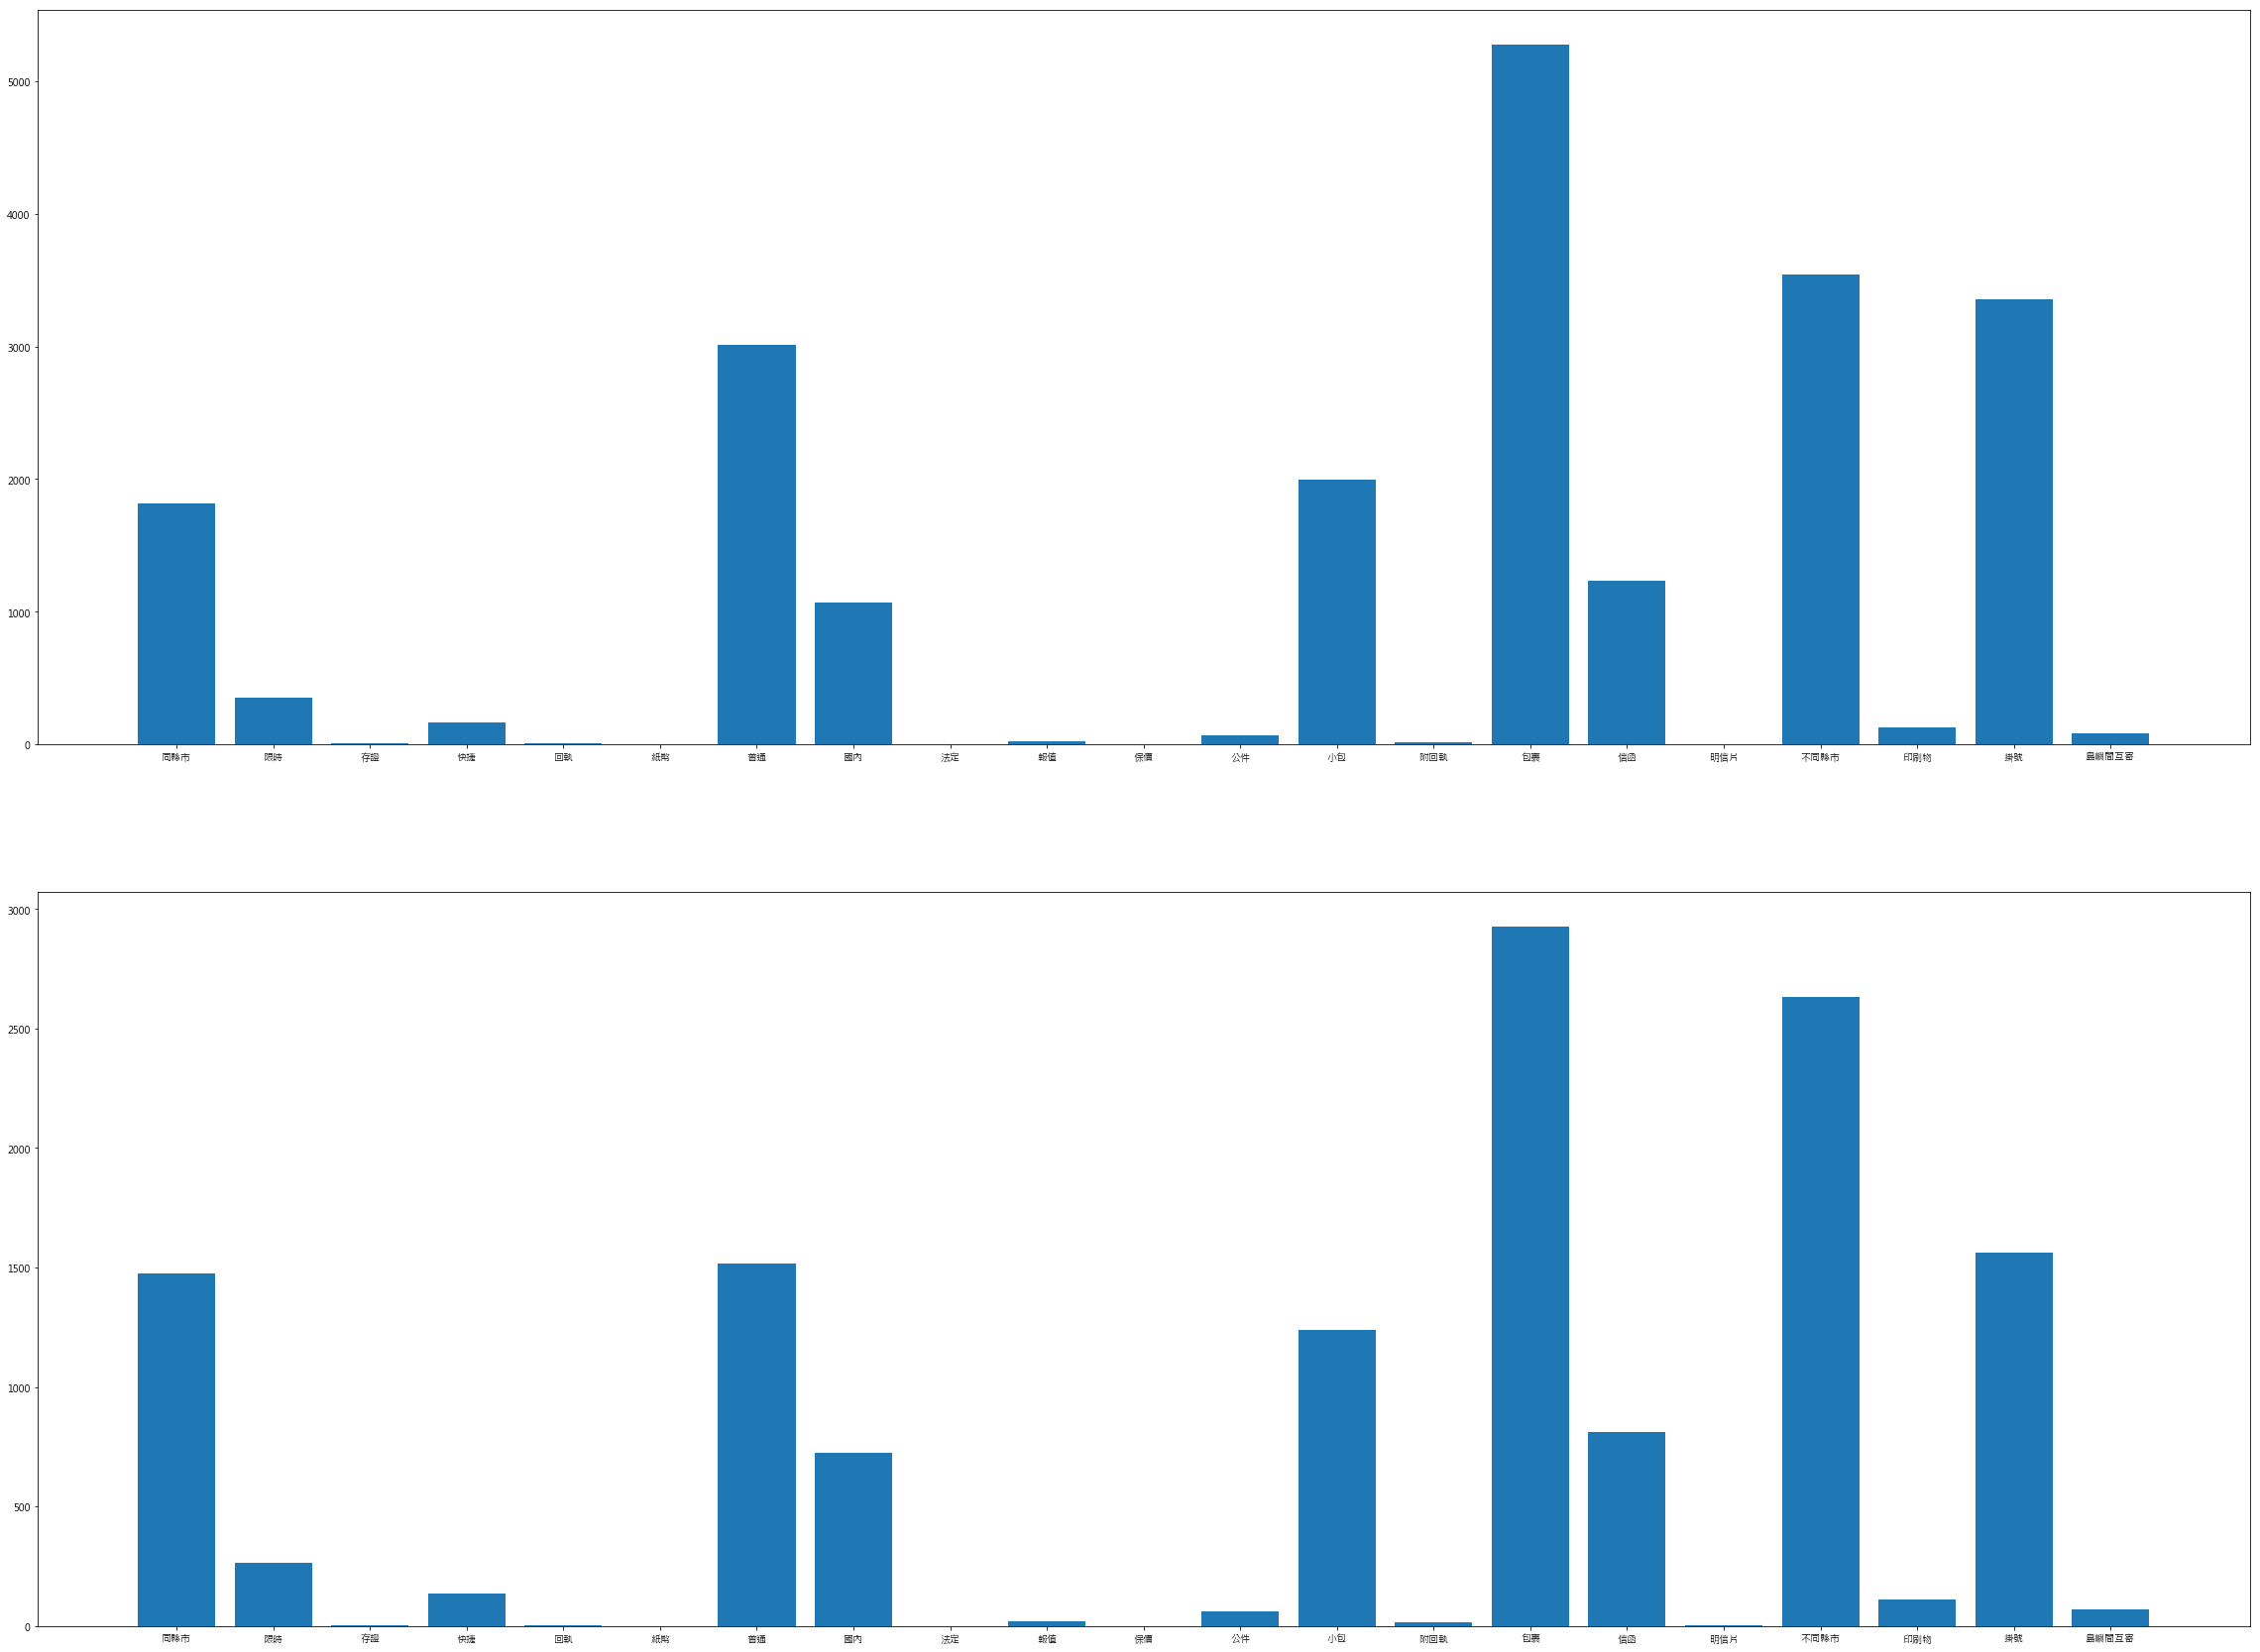

In [11]:
plt.figure(figsize=(40, 30))
ax1 = plt.subplot(211)
ax1.bar(wfm.keys(),list(np.sum(wfm,axis=0)))
ax2 = plt.subplot(212)
ax2.bar(df_tfidf.keys(),list(np.sum(df_tfidf,axis=0)) )

比較詞頻矩陣和TF-IDF矩陣針對重點文字的抓取能力:由上面前兩張圖可以發現在比較第一個郵件種類名稱時，雖然不同縣市和包裹都出現一次，但包裹出現在別的郵件種類名稱次數較高，因此TF-IDF將包裹的重要性降低；而由上面後兩張圖可以發現在比較所有郵件種類名稱時，雖然詞頻矩陣其小包出現頻率比同縣市高，但在TF-IDF矩陣卻是同縣市的重要性比小包還高。

由於郵件種類名稱斷詞後的數量非常多，無法看出字與字的關係是否合理，因此使用PCA降成二維在畫圖比較

Text(0, 0.5, 'Eigenvalue')

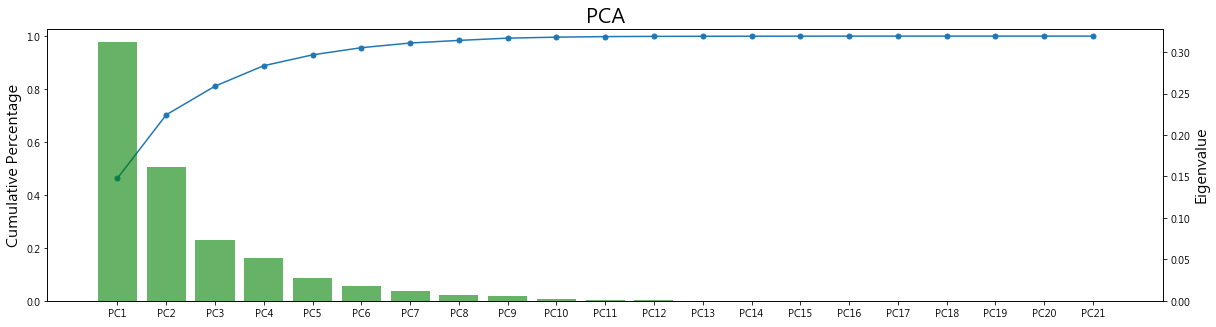

In [12]:
from sklearn.decomposition import PCA  
pca = PCA(n_components=21)  
reduced_X = pca.fit_transform(df_tfidf)  
cummulative_perc_variance = np.array(
[pca.explained_variance_[:i].sum()/pca.explained_variance_.sum() for i in range(1, pca.explained_variance_.shape[0] + 1)])
index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","PC21"]
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(111)
ax1.plot(index,cummulative_perc_variance,marker='.',ms=10)
ax1.set_ylabel('Cumulative Percentage',fontsize='15')
ax1.set_title("PCA",fontsize='20')
ax1.set_ylim(0,)
ax2 = ax1.twinx() 
ax2.bar(index,pca.explained_variance_,alpha=.6,color="g")
ax2.set_ylabel('Eigenvalue',fontsize='15') 

由上圖可以知道前兩個PC1和PC2的加總即可解釋原來資料中70%左右的變異，因此降成二維仍具有代表性

In [13]:
pca = PCA(n_components=2)  
reduced_X = pca.fit_transform(df_tfidf)  
print('特徵值：{}\n特徵向量：{}'.format(pca.explained_variance_,pca.components_))  
reduced_X=pd.DataFrame(reduced_X,columns=["PC1","PC2"])
reduced_X.head()

特徵值：[0.31230184 0.16151849]
特徵向量：[[-9.51366228e-02  3.97759456e-02  3.23086426e-04  1.69275062e-03
   5.53170727e-04  3.87377409e-05  3.91596394e-01  4.81807755e-02
   3.87377409e-05 -5.95343509e-04  1.03743942e-04 -4.16545592e-04
   3.36598574e-01  1.43484834e-03 -4.88240219e-01  1.77109010e-01
   1.47396820e-04 -5.46359148e-01  1.59168444e-02  3.89718429e-01
   2.24607707e-03]
 [ 8.09028130e-01 -2.62112941e-03  2.35529663e-04  7.36291697e-03
   1.04893996e-04  2.83666419e-05 -1.55921248e-01  2.60124544e-03
   2.83666419e-05  4.22821932e-04  5.74649279e-06  1.65769370e-02
  -1.46175217e-01  3.56776694e-04  6.19247921e-02 -4.95905338e-02
   5.95655462e-05 -5.20467583e-01 -1.36703149e-03 -1.49163195e-01
   4.46091576e-03]]


,PC1,PC2
0,-0.595596,-0.291936
1,0.773487,-0.181025
2,0.646616,-0.107718
3,0.646616,-0.107718
4,-0.595596,-0.291936


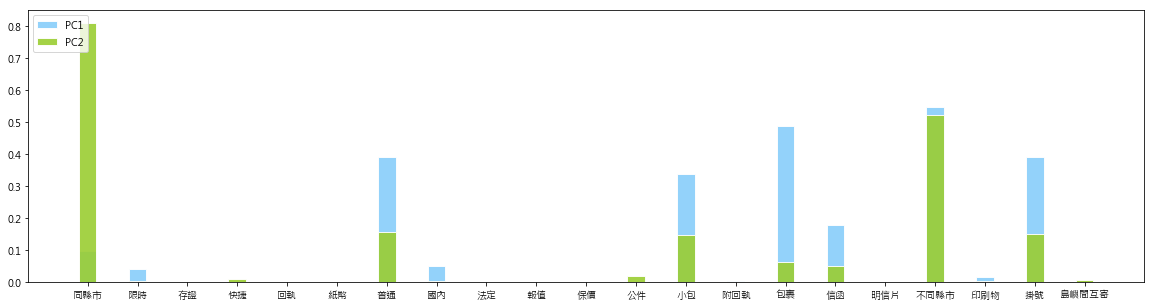

In [16]:
fig = plt.figure(figsize=(20, 5))
plt.bar(df_tfidf.columns,abs(pca.components_[0]), alpha=0.9, width = 0.35, facecolor = 'lightskyblue', edgecolor = 'white', label='PC1', lw=1)
plt.bar(df_tfidf.columns,abs(pca.components_[1]), alpha=0.9, width = 0.35, facecolor = 'yellowgreen', edgecolor = 'white', label='PC2', lw=1)
plt.legend(loc="upper left")
plt.show()

由特徵向量的係數絕對值大小可以看出PC1主要受普通、小包、掛號、包裹等文字影響，而PC2主要受不同縣市、普通、掛號、同縣市等文字影響

接著我想要利用K-means將文字分群，首先要決定k的數值(依輪廓係數決定)

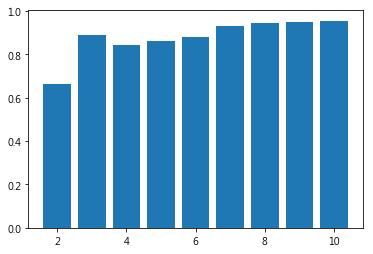

[0.6637137343531442, 0.8879815984286048, 0.8428074117794481, 0.8626749538562741, 0.8774220491701837, 0.9308787876612443, 0.9422223497863336, 0.9480356286542073, 0.9538965400335743]


In [17]:
from sklearn import cluster, datasets, metrics
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(reduced_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(reduced_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

由上圖可知當k=3時在k-means演算法的績效就算不錯了，因此分為三群並畫圖視覺化

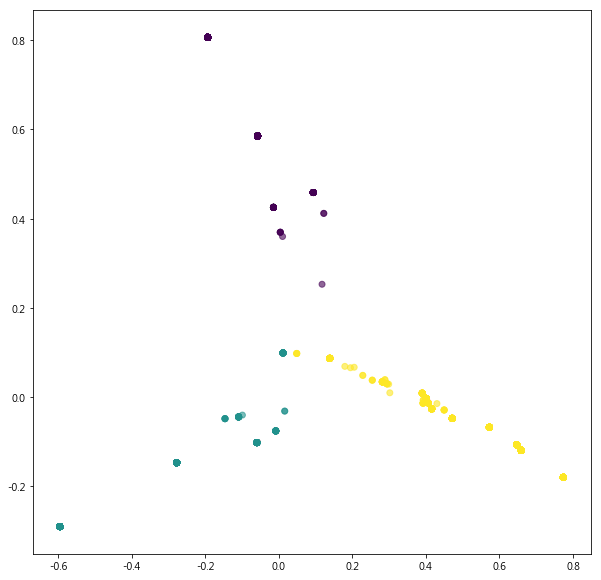

In [19]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
clf.fit(reduced_X)
clf.labels_
fig = plt.figure(figsize = (10,10))
plt.scatter(reduced_X['PC1'],reduced_X['PC2'], alpha=0.6,c=clf.labels_) 

In [20]:
clf.labels_

array([1, 2, 2, ..., 1, 0, 0])

上圖結果顯示分為三群其每個分群彼此間的差異滿大的，因此分成3群滿合理的

將每一筆資料標上郵件種類的類別再畫圖視覺化看看

D:\anaconda\envs\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


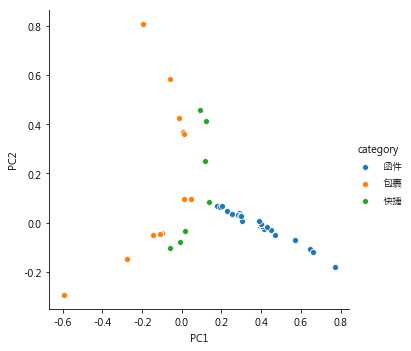

In [24]:
import seaborn as sns
temp = pd.DataFrame()
temp["category"]= pd.cut(accg3["acc12"],[0,1.5,2.5,3.5],labels=["函件","包裹","快捷"])
temp["PC1"]=reduced_X.PC1
temp["PC2"]=reduced_X.PC2
sns.pairplot(x_vars=['PC1'], y_vars=['PC2'], data=temp,hue="category", size=5)

由上圖可以發現三個種類的郵件在二維平面上來看快捷大多處於平均值0附近，而函件和包裹都有分化走向不同極端的現象，因此可以知道3個種類的郵件其特性並不同，但也有重疊相似的部分，不像k-means分群將其每一個分群彼此差異性高。

接下來我想找出各文字間的關聯性，因此先利用TF-IDF矩陣計算各文字間的相關矩陣，篩選出共線性高的字詞再做關聯性分析

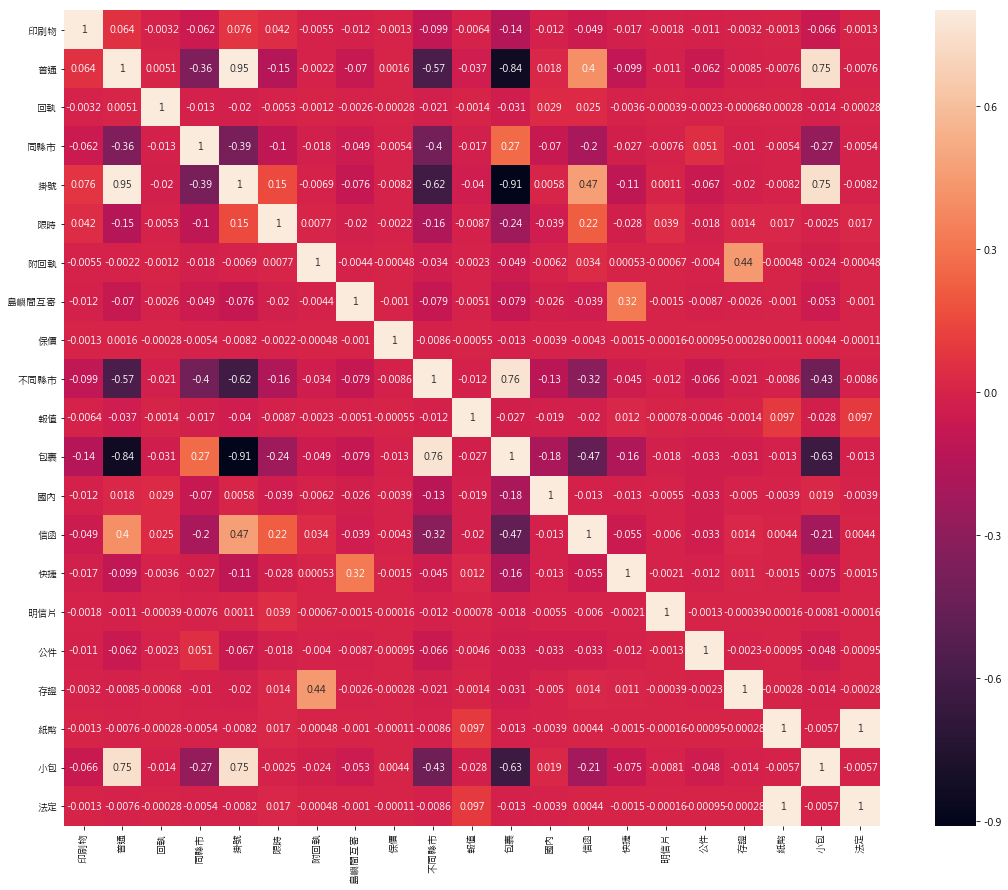

In [25]:
corrmat=df_tfidf.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':10})

淘汰相關係數低於0.2的文字，例如:明信片、回執、公件、印刷物、國內、報值、保價

In [10]:
delete_words=["明信片","回執","公件","印刷物","國內","報值","保價"]
wfm1=wfm.drop(delete_words,axis=1).copy()
wfm1=wfm1.astype("bool")
wfm1.head()

,不同縣市,存證,小包,法定,附回執,信函,快捷,普通,包裹,同縣市,島嶼間互寄,掛號,紙幣,限時
0,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,True,False,False,False,True,False,False
3,False,False,False,False,False,True,False,True,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,True,False,False,False,False,False


導入Apriori演算法進行關聯性分析 

In [11]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

minsup = 0.01
apriori(wfm1, min_support = minsup,use_colnames=True)
result = apriori(wfm1, min_support = minsup)
result

,support,itemsets
0,0.401794,(0)
1,0.226839,(2)
2,0.140213,(5)
3,0.019301,(6)
4,0.342075,(7)
5,0.598547,(8)
6,0.206403,(9)
7,0.380677,(11)
8,0.040077,(13)
9,0.392825,"(0, 8)"


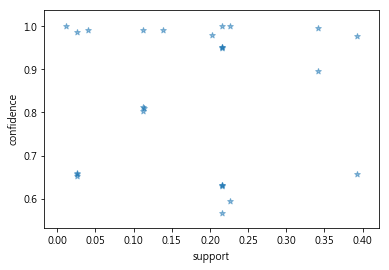

In [12]:
rules = association_rules(result, metric="confidence", min_threshold=0.5)
support = rules['support']
confidence = rules['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

由上圖可以看出confident的分布並不一致，而confident和lift越大表示先導項與後繼項的關聯性越強，因此接下來進行confident和lift的篩選

In [13]:
#support=支援度、condident=置信度、lift=應用關聯規則和不應用產生結果的比例
#confident越大表示先導項與後繼項的關聯性越強
rules = association_rules(result, metric="confidence", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(0),(8),0.401794,0.598547,0.392825,0.977677,1.633418,0.152332,17.984088
1,(2),(7),0.226839,0.342075,0.215713,0.950951,2.779946,0.138117,13.413606
2,(2),(11),0.226839,0.380677,0.226726,0.999499,2.625587,0.140373,1237.408038
3,(5),(11),0.140213,0.380677,0.138851,0.990283,2.601377,0.085475,63.738694
4,(7),(11),0.342075,0.380677,0.340940,0.996681,2.618183,0.210720,186.602123
5,(9),(8),0.206403,0.598547,0.202316,0.980198,1.637630,0.078774,20.273388
6,(13),(11),0.040077,0.380677,0.039737,0.991501,2.604576,0.024480,72.873713
7,"(2, 11)",(7),0.226726,0.342075,0.215599,0.950926,2.779874,0.138042,13.406892
8,"(2, 7)",(11),0.215713,0.380677,0.215599,0.999474,2.625519,0.133483,1176.714351
9,(2),"(11, 7)",0.226839,0.340940,0.215599,0.950450,2.787735,0.138261,13.301028


In [14]:
rules = association_rules(result, metric="lift", min_threshold=2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2),(7),0.226839,0.342075,0.215713,0.950951,2.779946,0.138117,13.413606
1,(7),(2),0.342075,0.226839,0.215713,0.630601,2.779946,0.138117,2.093022
2,(2),(11),0.226839,0.380677,0.226726,0.999499,2.625587,0.140373,1237.408038
3,(11),(2),0.380677,0.226839,0.226726,0.595586,2.625587,0.140373,1.911805
4,(5),(7),0.140213,0.342075,0.113760,0.811336,2.371805,0.065797,3.487283


In [15]:
rules["antecedant_len"] = rules["antecedents"].apply(lambda x: len(x))
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(2),(7),0.226839,0.342075,0.215713,0.950951,2.779946,0.138117,13.413606,1
1,(7),(2),0.342075,0.226839,0.215713,0.630601,2.779946,0.138117,2.093022,1
2,(2),(11),0.226839,0.380677,0.226726,0.999499,2.625587,0.140373,1237.408038,1
3,(11),(2),0.380677,0.226839,0.226726,0.595586,2.625587,0.140373,1.911805,1
4,(5),(7),0.140213,0.342075,0.113760,0.811336,2.371805,0.065797,3.487283,1


In [16]:
out = rules[ (rules['antecedant_len'] >= 1) &
       (rules['confidence'] > 0.9) &
       (rules['lift'] > 2) ].copy()
out

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedant_len
0,(2),(7),0.226839,0.342075,0.215713,0.950951,2.779946,0.138117,13.413606,1
2,(2),(11),0.226839,0.380677,0.226726,0.999499,2.625587,0.140373,1237.408038,1
7,(5),(11),0.140213,0.380677,0.138851,0.990283,2.601377,0.085475,63.738694,1
11,(7),(11),0.342075,0.380677,0.340940,0.996681,2.618183,0.210720,186.602123,1
13,(13),(11),0.040077,0.380677,0.039737,0.991501,2.604576,0.024480,72.873713,1
14,"(2, 11)",(7),0.226726,0.342075,0.215599,0.950926,2.779874,0.138042,13.406892,2
15,"(2, 7)",(11),0.215713,0.380677,0.215599,0.999474,2.625519,0.133483,1176.714351,2
17,(2),"(11, 7)",0.226839,0.340940,0.215599,0.950450,2.787735,0.138261,13.301028,1
20,"(2, 13)",(11),0.011126,0.380677,0.011126,1.000000,2.626901,0.006891,inf,2
24,"(5, 7)",(11),0.113760,0.380677,0.112738,0.991018,2.603306,0.069433,68.951332,2


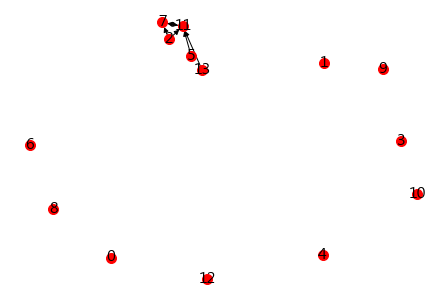

數字代表文字名稱: 
         0
0    不同縣市
1      存證
2      小包
3      法定
4     附回執
5      信函
6      快捷
7      普通
8      包裹
9     同縣市
10  島嶼間互寄
11     掛號
12     紙幣
13     限時 

獨立的文字:  [0, 1, 3, 4, 6, 8, 9, 10, 12]


In [20]:
import networkx as nx
G = nx.DiGraph()
for i in range(wfm1.shape[1]):
    G.add_node(i)
for i in range(len(out['antecedents'])):
    currentFrom = list(out['antecedents'].iloc[i])
    currentTo = list(out['consequents'].iloc[i])
    for j in range(len(currentFrom)):
       G.add_edge(currentFrom[j], currentTo[0])

# positions for all nodes
#pos = nx.fruchterman_reingold_layout(G)
nx.draw(G,font_size=15,node_size=100,node_color='r' ,with_labels=True)
#nx.draw_networkx_labels(G,pos,font_size=10)

plt.savefig("weighted_graph.png") # save as png
plt.show() # display
print("數字代表文字名稱: \n",pd.DataFrame(wfm1.columns),"\n")
print ("獨立的文字: ",list(nx.isolates(G))) 

有了關聯圖可以發現以下幾個關聯性:限時->掛號，掛號->普通，普通->掛號，小包->普通，信函->法定，小包->掛號。因此我們可以推論投遞到i郵箱的信件其內容特性，像是如果有一個客人投遞小包到i郵箱，可能會使用普通或是掛號的方式寄件。

# 目標二:了解各變數與ACC12(信函、包裹、快捷)之間的關係(預測模型)

挑出和ACC12有關係的變數並檢查其缺漏值數量

In [21]:
accg3_2=accg3[["acc2","acc12","acc16","acc17","acc19","acc21","acc23","acc24","acc26","acc29"
             ,"acc32"]].copy()
accg3_2["weight"]=accg3["acc31"]/accg3["acc30"]
print(accg3_2.describe())
print(accg3_2.shape[0]-accg3_2.count())
#print (pd.crosstab(accg3_2['acc2'], accg3_2['acc29']))

              acc2        acc12        acc16        acc17        acc19  \
count  8808.000000  8808.000000  8808.000000  8808.000000  8808.000000   
mean      0.100817     1.637148     0.003292     0.000681     0.000454   
std       0.301104     0.519444     0.071405     0.026092     0.021307   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000     1.000000     0.000000     0.000000     0.000000   
50%       0.000000     2.000000     0.000000     0.000000     0.000000   
75%       0.000000     2.000000     0.000000     0.000000     0.000000   
max       1.000000     3.000000     4.000000     1.000000     1.000000   

             acc21        acc23        acc24        acc26        acc29  \
count  8808.000000  8808.000000  8808.000000  8528.000000  8808.000000   
mean      0.000114     0.040077     0.002838     1.917097     2.465145   
std       0.010655     0.196151     0.055296     0.275752     1.805436   
min       0.000000     0.000000     0

acc26缺了280筆資料，然而總共只有8000多筆資料，如果直接淘汰280筆資料並不適合，因此選擇用KNN演算法填補缺漏值

In [22]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
 
def knn_missing_filled(x_train, y_train, test, k = 3, dispersed = True):
    if dispersed:
        clf = KNeighborsClassifier(n_neighbors = k, weights = "distance")
    else:
        clf = KNeighborsRegressor(n_neighbors = k, weights = "distance")
    
    clf.fit(x_train, y_train)
    return clf.predict(test)

In [23]:
na_position=accg3_2[(accg3_2.acc26.isnull()==True)].index.tolist()
x_train=accg3_2[["acc2","acc12","acc16","acc17","acc19","acc21","acc23","acc24","acc29"
             ,"acc32","weight"]].copy().drop( na_position )
test=accg3_2.iloc[na_position].dropna(axis=1,how='all') 
y_train=accg3[["acc26"]].copy().drop( na_position )
accg3_2["acc26"][accg3_2.iloc[na_position].index]=knn_missing_filled(x_train,y_train,test)
accg3_2.head()

D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,acc2,acc12,acc16,acc17,acc19,acc21,acc23,acc24,acc26,acc29,acc32,weight
0,0,2,0,0,0,0,0,0,2.0,1,1,833.0
1,0,1,0,0,0,0,0,0,2.0,3,1,40.0
2,0,1,0,0,0,0,0,0,2.0,1,1,12.0
3,0,1,0,0,0,0,0,0,2.0,1,1,20.0
4,0,2,0,0,0,0,0,0,2.0,5,1,1853.0


因為應變數為類別資料，而自變數包含連續資料和類別資料，因此無法使用線性回歸，改使用Multinomial logistic regression
(其目標在於當自變項增加一個單位，依變項1相對依變項0的發生機率會增加幾倍)

In [24]:
import statsmodels.api as sm
import pylab as pl

在logit模型中，如果某一項變數是類別資料要將其轉成dummy variable。假設某一個變數產生5個dummy variable，只要引入4個就好以防止多元共線性的問題產生。此外，還要加入一個常數項。

In [25]:
dummy_ranks29 = pd.get_dummies(accg3_2['acc29'], prefix='acc29') #1 3 4 5 6
dummy_ranks16 = pd.get_dummies(accg3_2['acc16'], prefix='acc16') #0 1 2 4
dummy_ranks24 = pd.get_dummies(accg3_2['acc24'], prefix='acc24') #0 1 2

data=(accg3_2.copy().drop("acc29",axis=1)).join(dummy_ranks29.ix[:,'acc29_3':])
data=(data.drop("acc16",axis=1)).join(dummy_ranks16.ix[:,'acc16_1':])
data=(data.drop("acc24",axis=1)).join(dummy_ranks24.ix[:,'acc24_1':])
data=sm.add_constant(data)
data.head()

D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
D:\anaconda\envs\python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Me

,const,acc2,acc12,acc17,acc19,acc21,acc23,acc26,acc32,weight,acc29_3,acc29_4,acc29_5,acc29_6,acc16_1,acc16_2,acc16_4,acc24_1,acc24_2
0,1.0,0,2,0,0,0,0,2.0,1,833.0,0,0,0,0,0,0,0,0,0
1,1.0,0,1,0,0,0,0,2.0,1,40.0,1,0,0,0,0,0,0,0,0
2,1.0,0,1,0,0,0,0,2.0,1,12.0,0,0,0,0,0,0,0,0,0
3,1.0,0,1,0,0,0,0,2.0,1,20.0,0,0,0,0,0,0,0,0,0
4,1.0,0,2,0,0,0,0,2.0,1,1853.0,0,0,1,0,0,0,0,0,0


接下來開始測試各種變數組合的自變數與acc12應變數產生的logit model，其最終目標在於得到最高的Pseudo R-squared值且每個變數的係數具有顯著性( (P>|z|) <0.05)

In [26]:
#train_cols = list(data.columns[:2])+list(data.columns[4:])
#logit = sm.MNLogit(data['acc12'], data[train_cols])
logit = sm.MNLogit(data['acc12'], data[["acc2","acc26","acc32","weight","const"]])
result = logit.fit()
print (result.summary())

D:\anaconda\envs\python36\lib\site-packages\statsmodels\discrete\discrete_model.py:2154: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
D:\anaconda\envs\python36\lib\site-packages\statsmodels\discrete\discrete_model.py:2155: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully.
         Current function value: nan
         Iterations 13
                          MNLogit Regression Results                          
Dep. Variable:                  acc12   No. Observations:                 8808
Model:                        MNLogit   Df Residuals:                     8798
Method:                           MLE   Df Model:                            8
Date:                Wed, 08 May 2019   Pseudo R-squ.:                     nan
Time:                        10:45:52   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -6614.8
                                        LLR p-value:                       nan
   acc12=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
acc2          -2.6373      0.365     -7.221      0.000      -3.353      -1.921
acc26         -1.8951      0.403 

D:\anaconda\envs\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\anaconda\envs\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\anaconda\envs\python36\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


最後塞選出4個會影響郵件種類的變數，包含"是否特約"，"特約戶繳費方式"，"寄件數量"，"單件重量"。我們可以從變數的係數解讀，客戶會選擇使用包裹(acc12=2)，主要會受寄件重量的正向影響，如果寄件的重量很重，會增加使用包裹的可能性；然而如果寄件的數量很多、並且繳費方式為當場繳費，會降低使用包裹的可能性。如果我們再進一步比較包裹和快捷(acc12=3)的差異，可以發現快捷受到寄件數量多寡的負面影響比包裹還大，可能原因是因為快捷的目的在於快速寄送服務，但相對的支付費用也會比較高，因此寄件數量一大成本變高可能會降低寄件人的接受度；此外，我們也能發現是否特約的係數(acc2)在包裹和快捷一個是正面效應一個是負面效應，可能原因是因為成為特約戶能得到的折扣優惠比較高，因此選擇使用快捷的意願會提高而使用包裹的意願會降低。